In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, KMeans

In [3]:
# Ward clustering method example
x = np.random.rand(10,1)   # (samples, features) <--> e.g. (time intervels, closing price)

connectivity = None   #sparse matrix
n_clusters = 10
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(x)
ward.labels_

array([6, 7, 8, 9, 4, 3, 5, 2, 1, 0], dtype=int64)

In [4]:
# ref: https://towardsdatascience.com/using-k-means-clustering-to-create-support-and-resistance-b13fdeeba12

In [5]:
df = pd.read_csv('assets/data/structure_learning/GME_stock.csv', parse_dates=['date'],)
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


Total number of iteration(s): 6 

List of the positions of the cluster centers: [[9.230769233453374], [23.420136688593033], [44.13776896289424], [229.69667053222656]]



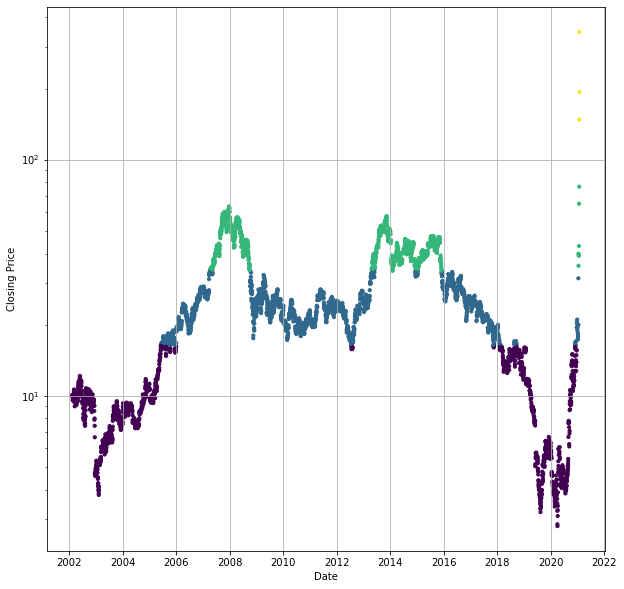

In [12]:
# K-Means clustering for the given data points
n_clusters = 4
X = df['date']
Y = df['close_price'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10).fit(Y)
cluster_centers = kmeans.cluster_centers_.tolist()
print(f'Total number of iteration(s): {kmeans.n_iter_} \n')
print('List of the positions of the cluster centers: [{}]\n'.format(', '.join(map(str, cluster_centers))))

plt.figure(figsize=(10,10))
plt.scatter(X.values, Y, c=kmeans.predict(Y), s=10, cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.yscale('log')
plt.grid()
plt.show()

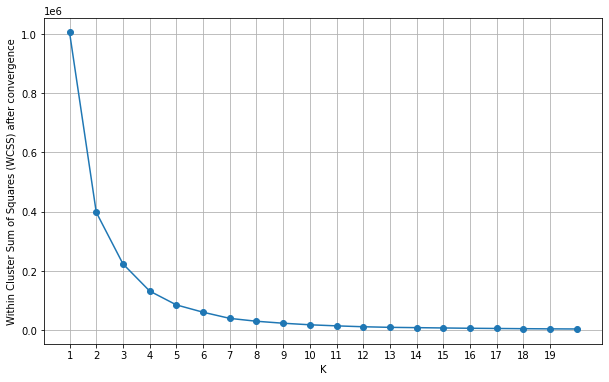

In [7]:
def WCSS(X, K=2):
    # Return a list of WCSS after convergence (i.e. equivalent to kmeans.inertia_) for different number of clusters, K.
    result = []
    for k in range(1, K+1):
        kmeans = KMeans(n_clusters=k).fit(X)
        C = np.array([kmeans.cluster_centers_[cc] for cc in kmeans.labels_])
        result.append(np.sum((X-C)**2))
    return result

K = 20
wcss = WCSS(Y, K)
fig = plt.figure(figsize=(10, 6))
plt.xlabel('K')
plt.ylabel('Within Cluster Sum of Squares (WCSS) after convergence')
plt.grid()
plt.plot(range(1, K+1), wcss, marker='o')
plt.xticks(range(1,K))
plt.show()

In [8]:
kn = KneeLocator(range(1, K+1), wcss, curve='convex', direction='decreasing')
print(kn.knee)

4
